In [1]:
# importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# About the Dataset
Paysim synthetic dataset of mobile money transactions. Each step represents an hour of simulation. This dataset is scaled down 1/4 of the original dataset which is presented in the paper "PaySim: A financial mobile money simulator for fraud detection".

## Columns
1. step : Maps a unit of time in the real world. In this case 1 step is 1 hour of time.
2. type : CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER
3. amount : Amount of the transaction in local currency
4. nameOrig : Customer who started the transaction
5. oldbalanceOrg : Initial balance before the transaction
6. newbalanceOrig : Customer's balance after the transaction.
7. nameDest : Recipient ID of the transaction.
8. oldbalanceDest : Initial recipient balance before the transaction.
9. newbalanceDest : Recipient's balance after the transaction.
10. isFraud : Identifies a fraudulent transaction (1) and non fraudulent (0)
11. isFlaggedFraud : Flags illegal attempts to transfer more than 200.000 in a single transaction.

In [2]:
# Loading the csv file
df=pd.read_csv("PS_20174392719_1491204439457_log.csv")
# Printing first 5 rows
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
# Printing dimension of dataset (Rows, Columns)
df.shape

(6362620, 11)

In [4]:
# Information about Null Values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
# Printing the number of null values in each column
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Data Visualisation

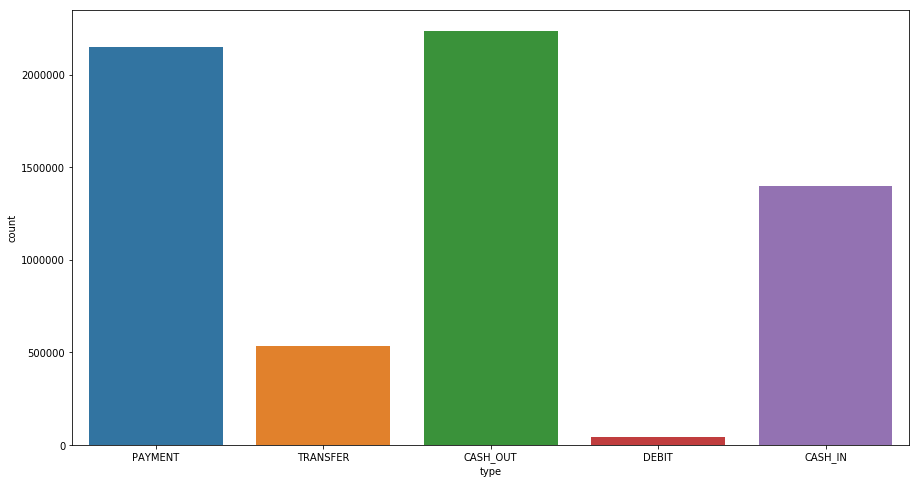

In [6]:
plt.figure(figsize=(15,8))
sns.countplot(df["type"])

In [7]:
df["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

From this plot and value count, we can say that most people do transaction by CASH_OUT followed by PAYMENT

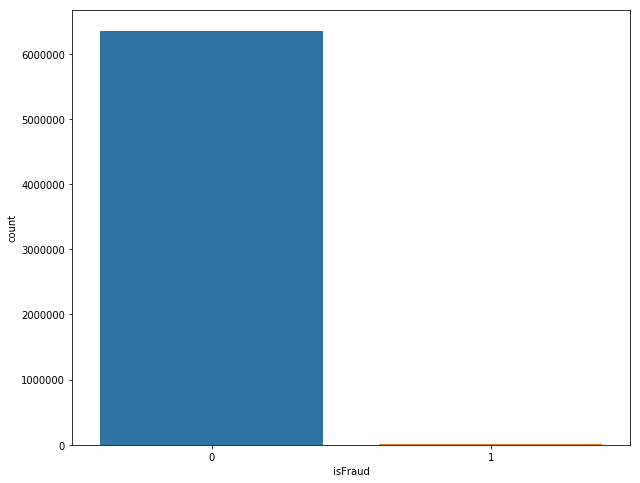

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(df["isFraud"])

In [9]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

From this plot and value count, there is only few fraudulent transaction (1) as compared to non fraudulent transaction (0)

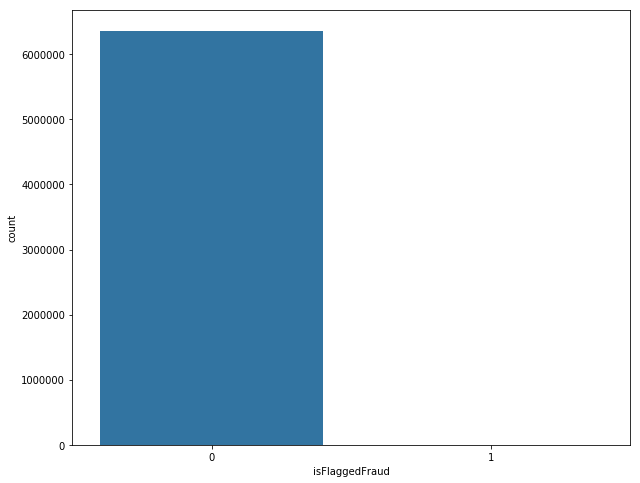

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(df["isFlaggedFraud"])

In [11]:
df["isFlaggedFraud"].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

From the plot and value count, we can say that there is very less illegal attempts to transfer more than 200.000 in a single transaction which is represented by value 1.

Text(0, 0.5, 'Amount of the transaction in local currency')

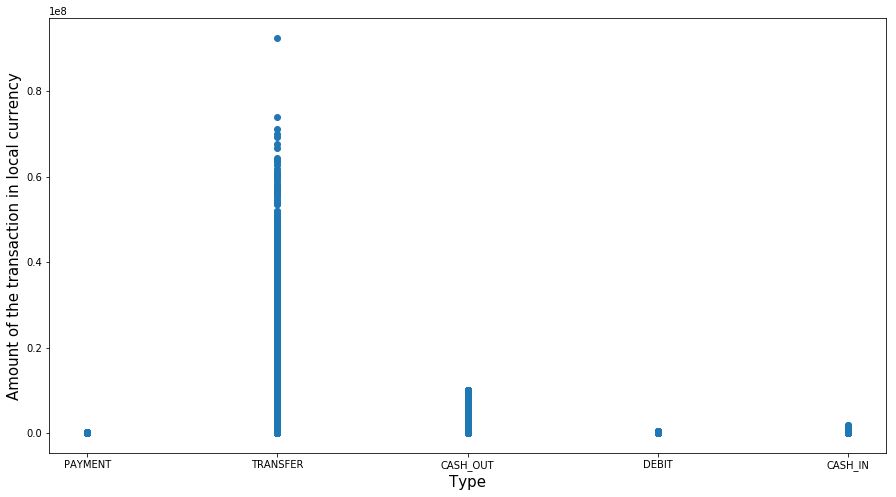

In [12]:
plt.figure(figsize=(15,8))
plt.scatter(df["type"],df["amount"])
plt.xlabel("Type", fontsize=15)
plt.ylabel("Amount of the transaction in local currency", fontsize=15)

From the plot, we can say that people do high amount transaction through Transfer.

Text(0.5, 0, '(Value1,Value2) where Value1 is Transaction Type and Value2 is isFraud(0:No, 1:Yes)')

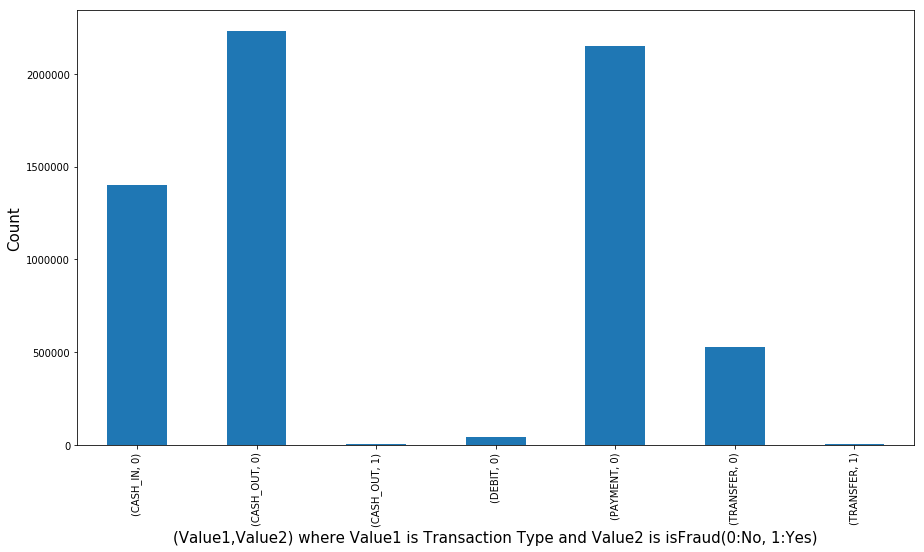

In [13]:
plt.figure(figsize=(15,8))
df.groupby(["type","isFraud"]).size().plot(kind="bar")
plt.ylabel("Count", fontsize=15)
plt.xlabel("(Value1,Value2) where Value1 is Transaction Type and Value2 is isFraud(0:No, 1:Yes)", fontsize=15)

From the plot, we see that there is only two type CASH_OUT and TRANSFER in which fraudulent transaction happened.

# Feature Engineering

In [14]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [15]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [16]:
# Columns nameOrig and nameDest are not important because first one is name and second one is Id so drop them
df.drop(["nameOrig", "nameDest"], axis=1, inplace=True)
df.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [17]:
# create the Label encoder object
le = LabelEncoder()

# convert the categorical columns into numeric by assigning a numerical lebel to categorical label
df["type"] =le.fit_transform(df["type"])
    
col_mappings = {index: label for index, label in enumerate(le.classes_)}
print("Mapping in column type")
print("****"*30)
print(col_mappings)

Mapping in column type
************************************************************************************************************************
{0: 'CASH_IN', 1: 'CASH_OUT', 2: 'DEBIT', 3: 'PAYMENT', 4: 'TRANSFER'}


In [18]:
df.dtypes

step                int64
type                int32
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [19]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Creating Model

In [20]:
# Splitting the Dataset into training and testing part

x=df.drop("isFraud", axis=1)
y=df['isFraud']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5090096, 8)
(5090096,)
(1272524, 8)
(1272524,)


In [21]:
# Standardising the data
# Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated

scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [22]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Creating object
model=LogisticRegression()

# Training the model
model.fit(x_train,y_train)

# Prediction
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
print("Accuracy of Logistic Regression is {:.2f} %" .format(model.score(x_test,y_test)*100))

Accuracy of Logistic Regression is 99.92 %
